<a href="https://colab.research.google.com/github/luizabreu77/Repositorio_Imersao/blob/main/Carro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.6 MB/s eta 0:00:00


In [22]:
!pip install -q -U matplotlib

In [23]:
import time
import matplotlib.pyplot as plt

In [24]:
import google.generativeai as genai
from google.colab import userdata


In [20]:
# Substitua 'YOUR_API_KEY' pela sua chave API real
api_key = userdata.get("SECRET_KEY")
genai.configure(api_key=api_key)

🤖 Olá! 👋 Sou um chatbot de manutenção de veículos. Para te ajudar melhor, preciso de algumas informações:
Qual o fabricante do seu veículo? 🚗 Renault
Qual o modelo? Kwid
Qual o ano? 2023
Qual a quilometragem atual? 5300

---
🤖 Olá! 👋 Sou um chatbot de manutenção de veículos. O que você gostaria de fazer hoje?
1️⃣ Calcular consumo
2️⃣ Controle de manutenção preventiva
3️⃣ Histórico do consumo
4️⃣ Sair
---
Digite o número da opção desejada: 1
🚗💨  **Calculando Consumo**
Quantos Km você rodou desde o último abastecimento? 400
Quantos litros você abasteceu? 30
Qual o preço do litro da gasolina? 5.4
⛽ Seu consumo atual é de **13.33 Km/l**. 
💰 Você gastou **R$162.00** neste abastecimento.

---
🤖 Olá! 👋 Sou um chatbot de manutenção de veículos. O que você gostaria de fazer hoje?
1️⃣ Calcular consumo
2️⃣ Controle de manutenção preventiva
3️⃣ Histórico do consumo
4️⃣ Sair
---
Digite o número da opção desejada: 1
🚗💨  **Calculando Consumo**
Quantos Km você rodou desde o último abastecimento? 350
Q

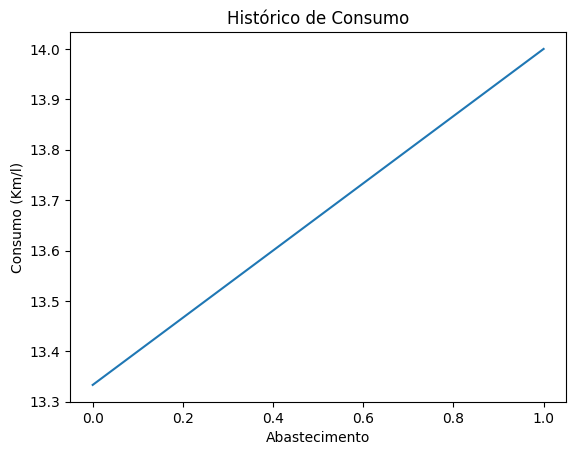


---
🤖 Olá! 👋 Sou um chatbot de manutenção de veículos. O que você gostaria de fazer hoje?
1️⃣ Calcular consumo
2️⃣ Controle de manutenção preventiva
3️⃣ Histórico do consumo
4️⃣ Sair
---
Digite o número da opção desejada: 1
🚗💨  **Calculando Consumo**
Quantos Km você rodou desde o último abastecimento? 250
Quantos litros você abasteceu? 10
Qual o preço do litro da gasolina? 5.6
⛽ Seu consumo atual é de **25.00 Km/l**. 
💰 Você gastou **R$56.00** neste abastecimento.

---
🤖 Olá! 👋 Sou um chatbot de manutenção de veículos. O que você gostaria de fazer hoje?
1️⃣ Calcular consumo
2️⃣ Controle de manutenção preventiva
3️⃣ Histórico do consumo
4️⃣ Sair
---
Digite o número da opção desejada: 3
📊 **Histórico de Consumo**


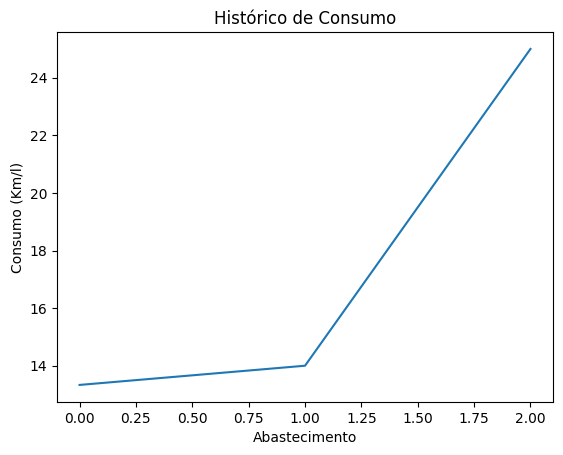


---
🤖 Olá! 👋 Sou um chatbot de manutenção de veículos. O que você gostaria de fazer hoje?
1️⃣ Calcular consumo
2️⃣ Controle de manutenção preventiva
3️⃣ Histórico do consumo
4️⃣ Sair
---
Digite o número da opção desejada: Fim
🤖 Opção inválida. Por favor, escolha uma opção válida.

---
🤖 Olá! 👋 Sou um chatbot de manutenção de veículos. O que você gostaria de fazer hoje?
1️⃣ Calcular consumo
2️⃣ Controle de manutenção preventiva
3️⃣ Histórico do consumo
4️⃣ Sair
---
Digite o número da opção desejada: 4
🤖 Até logo! Dirija com segurança. 👋


In [27]:
# Configurações do modelo
generation_config = {
    "candidate_count": 1,
    "temperature": 0.7,
}
safety_settings = {
    "HARASSMENT": "BLOCK_NONE",
    "HATE": "BLOCK_NONE",
    "DANGEROUS": "BLOCK_NONE",
    "SEXUAL": "BLOCK_NONE"
}

# Crie o modelo
model = genai.GenerativeModel(
    model_name="gemini-pro",
    generation_config=generation_config,
    safety_settings=safety_settings
)

# Dados do veículo e histórico de consumo
veiculo = {}
historico_consumo = []

def calcular_consumo():
    print("🚗💨  **Calculando Consumo**")
    km_rodado = float(input("Quantos Km você rodou desde o último abastecimento? "))
    litros = float(input("Quantos litros você abasteceu? "))
    preco_litro = float(input("Qual o preço do litro da gasolina? "))

    consumo = km_rodado / litros
    gasto_total = litros * preco_litro

    historico_consumo.append(consumo)
    if len(historico_consumo) > 5:
        historico_consumo.pop(0)

    print(f"⛽ Seu consumo atual é de **{consumo:.2f} Km/l**. ")
    print(f"💰 Você gastou **R${gasto_total:.2f}** neste abastecimento.")

def controle_manutencao():
    print("🛠️ **Controle de Manutenção**")
    modelo = veiculo.get('modelo')
    km_atual = veiculo.get('km')

    # Lógica simplificada - idealmente, usar dados reais de intervalos de revisão
    if modelo:
        if km_atual < 10000:
            print(f"🗓️ Seu **{modelo}** precisa de revisão a cada 10.000 Km. Faltam **{10000 - km_atual} Km**.")
        else:
            print(f"🗓️ Seu **{modelo}** precisa de revisão a cada 10.000 Km. Você está com **{km_atual - 10000} Km** desde a última revisão.")
    else:
        print("🤔 Preciso saber o modelo do seu veículo para calcular a revisão.")

def mostrar_grafico_consumo():
    print("📊 **Histórico de Consumo**")
    if historico_consumo:
        plt.plot(historico_consumo)
        plt.xlabel("Abastecimento")
        plt.ylabel("Consumo (Km/l)")
        plt.title("Histórico de Consumo")
        plt.show()
    else:
        print("Ainda não há dados de consumo suficientes.")

def exibir_menu():
    print("\n---")
    print("🤖 Olá! 👋 Sou um chatbot de manutenção de veículos. O que você gostaria de fazer hoje?")
    time.sleep(1) # Simula tempo de digitação
    print("1️⃣ Calcular consumo")
    print("2️⃣ Controle de manutenção preventiva")
    print("3️⃣ Histórico do consumo")
    print("4️⃣ Sair")
    print("---")

# Inicie a conversa
chat = model.start_chat()

print("🤖 Olá! 👋 Sou um chatbot de manutenção de veículos. Para te ajudar melhor, preciso de algumas informações:")
veiculo['fabricante'] = input("Qual o fabricante do seu veículo? 🚗 ")
veiculo['modelo'] = input("Qual o modelo? ")
veiculo['ano'] = input("Qual o ano? ")
veiculo['km'] = int(input("Qual a quilometragem atual? "))

while True:
    exibir_menu()
    opcao = input("Digite o número da opção desejada: ")

    if opcao == '1':
        calcular_consumo()
    elif opcao == '2':
        controle_manutencao()
    elif opcao == '3':
        mostrar_grafico_consumo()
    elif opcao == '4':
        print("🤖 Até logo! Dirija com segurança. 👋")
        break
    else:
        print("🤖 Opção inválida. Por favor, escolha uma opção válida.")
    time.sleep(1)